# **Data Cleaning**

## **Import Package**

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import additional files with statistical functions
import sys
import os

### **Data**

In [87]:
data = pd.read_excel('DATA AR JANUARI - MEI 2023 - FIX - Copy.xlsx')
data.head()

,Nomor,AR_Type,Cust Name,Segment,Bidang_Baku,Tipe,Layanan,Bandwidth,Biaya_Sewa,Address Terminating,SBU_Ter,AL_Status,Kabupaten/Kota,Wilayah
0,1,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,"(Kantor Kecamatan Singgahan) Jojogan, Mulyoagu...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban
1,2,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,(Kantor Kecamatan Plumpang) Jl. Raya Plumpang ...,SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban
2,3,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,(Kantor Kecamatan Parengan) Jl. Cokrokusumo No...,SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban
3,4,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,(Kantor Kecamatan Kerek) Jalan Raya Kresek No....,SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban
4,5,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,"(Kantor Kecamatan Kenduruan) Jl. Blora No. 01,...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban


## **Feature Engineering**

In [88]:
#drop rows that contain specific 'value' in 'column_name'
data2 = data[(data.Bandwidth != "Units") & (data.Layanan != "Penambahan IPv4 Publik Internet Corporate") & (data.Biaya_Sewa != 0.0) & 
             (data.AL_Status == "Active") & (data.SBU_Ter == "SBU REG JAWA BAGIAN TIMUR") & (data.AR_Type == "New")]
data2.head()

,Nomor,AR_Type,Cust Name,Segment,Bidang_Baku,Tipe,Layanan,Bandwidth,Biaya_Sewa,Address Terminating,SBU_Ter,AL_Status,Kabupaten/Kota,Wilayah
218,738,New,SMP NEGERI 1 NGLEGOK BLITAR,Education,Pendidikan,Internet,Internet Broadband Corporate,100,1800000.0,"Jl. SMP Desa Dayu,Nglegok ,Kabupaten Blitar ,J...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Blitar
219,738,New,DESA TEBALO KECAMATAN MANYAR KAB. GRESIK,Government,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,20,520000.0,Kantor Balai Desa Tebalo Jalan Raya Masjid Jam...,SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Gresik
260,738,New,PT. RISET PERKEBUNAN NUSANTARA,Manufacture,"Aktivitas Profesional, Ilmiah Dan Teknis",Internet,Internet Broadband Corporate,100,1415000.0,"Jl. Kaliwining, Gebang, Nogosari, Rambipuji, ...",SBU REG JAWA BAGIAN TIMUR,Active,Kota,Jember
269,738,New,SMP NEGERI 2 PLOSOKLATEN KEDIRI,Education,Pendidikan,Internet,Internet Broadband Corporate,100,1700000.0,"Ds. Wonorejo, Trisulo, Plosoklaten, Plosoklat...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Kediri
271,738,New,SMP NEGERI 3 PLOSOKLATEN KEDIRI,Education,Pendidikan,Internet,Internet Broadband Corporate,50,985000.0,"Jl. Hasanudin, Kel. Gondang,,Plosoklaten ,Kabu...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Kediri


In [89]:
data3 = data2.drop(['Nomor', 'Segment','Cust Name', 'Address Terminating', 'SBU_Ter', 'AL_Status','AR_Type'], axis=1)
data3.head()

,Bidang_Baku,Tipe,Layanan,Bandwidth,Biaya_Sewa,Kabupaten/Kota,Wilayah
218,Pendidikan,Internet,Internet Broadband Corporate,100,1800000.0,Kabupaten,Blitar
219,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,20,520000.0,Kabupaten,Gresik
260,"Aktivitas Profesional, Ilmiah Dan Teknis",Internet,Internet Broadband Corporate,100,1415000.0,Kota,Jember
269,Pendidikan,Internet,Internet Broadband Corporate,100,1700000.0,Kabupaten,Kediri
271,Pendidikan,Internet,Internet Broadband Corporate,50,985000.0,Kabupaten,Kediri


In [90]:
data3['Bidang_Baku'].value_counts()

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib    376
Pendidikan                                                         20
Industri Pengolahan                                                 8
Aktivitas Kesehatan Manusia Dan Aktivitas Sosial                    4
Informasi dan Komunikasi                                            4
Kesenian, Hiburan, dan Rekreasi                                     3
Aktivitas Profesional, Ilmiah Dan Teknis                            2
Pengadaan Listrik, Gas, Uap/Air Panas Dan Udara Dingin              2
Pertanian, Kehutanan dan Perikanan                                  2
Real Estat                                                          1
Aktivitas Keuangan dan Asuransi                                     1
Pengangkutan dan Pergudangan                                        1
Name: Bidang_Baku, dtype: int64

In [91]:
data3['Tipe'].value_counts()

Internet    416
Network       8
Name: Tipe, dtype: int64

In [92]:
data3['Kabupaten/Kota'].value_counts()

Kota         366
Kabupaten     58
Name: Kabupaten/Kota, dtype: int64

In [93]:
data3['Layanan'].value_counts()

Internet Broadband Corporate    318
Internet Corporate               96
Metronet                          5
IP VPN                            3
IP Transit                        1
IP Transit IIX                    1
Name: Layanan, dtype: int64

In [94]:
data3['Bandwidth'].value_counts()

20      280
15       72
50       31
100      19
10        7
5         6
30        3
1200      2
150       1
200       1
40        1
3         1
Name: Bandwidth, dtype: int64

In [95]:
data3['Wilayah'].value_counts()

Mojokerto      280
Malang          99
Tuban            6
Kediri           6
Surabaya         4
Jember           4
Tulungagung      4
Pasuruan         3
Ponorogo         2
Batu             2
Blitar           2
Trenggalek       2
Gresik           2
Sidoarjo         2
Madiun           2
Bojonegoro       1
Nganjuk          1
Sumenep          1
Pamekasan        1
Name: Wilayah, dtype: int64

## **Preprocessing**

In [96]:
data3.info() #informasi dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 218 to 1743
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bidang_Baku     424 non-null    object 
 1   Tipe            424 non-null    object 
 2   Layanan         424 non-null    object 
 3   Bandwidth       424 non-null    object 
 4   Biaya_Sewa      424 non-null    float64
 5   Kabupaten/Kota  424 non-null    object 
 6   Wilayah         424 non-null    object 
dtypes: float64(1), object(6)
memory usage: 26.5+ KB


In [97]:
# Cek missing value
data3.isnull().sum()

Bidang_Baku       0
Tipe              0
Layanan           0
Bandwidth         0
Biaya_Sewa        0
Kabupaten/Kota    0
Wilayah           0
dtype: int64

In [98]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# Select the columns for ordinal encoding
data4 = data3

# Define ordinal encoder
encoder = OrdinalEncoder()

# Perform ordinal encoding
data4[["Bidang_Baku","Tipe","Layanan","Kabupaten/Kota","Wilayah"]] = encoder.fit_transform(data4[["Bidang_Baku","Tipe","Layanan","Kabupaten/Kota","Wilayah"]])

# Print the encoded dataset
print(encoder.fit_transform(data4[["Bidang_Baku","Tipe","Layanan","Kabupaten/Kota","Wilayah"]]))

[[ 7.  0.  3.  0.  1.]
 [ 0.  0.  3.  0.  3.]
 [ 3.  0.  3.  1.  4.]
 ...
 [ 4.  1.  5.  1.  4.]
 [ 4.  1.  5.  1.  5.]
 [ 4.  1.  5.  0. 10.]]


In [99]:
data4.info() #informasi dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 218 to 1743
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bidang_Baku     424 non-null    float64
 1   Tipe            424 non-null    float64
 2   Layanan         424 non-null    float64
 3   Bandwidth       424 non-null    object 
 4   Biaya_Sewa      424 non-null    float64
 5   Kabupaten/Kota  424 non-null    float64
 6   Wilayah         424 non-null    float64
dtypes: float64(6), object(1)
memory usage: 26.5+ KB


In [100]:
# converting  from float to int
data4["Bidang_Baku"] = data4["Bidang_Baku"].astype(int)
data4["Tipe"] = data4["Tipe"].astype(int)
data4["Layanan"] = data4["Layanan"].astype(int)
data4["Bandwidth"] = data4["Bandwidth"].astype(int)
data4["Biaya_Sewa"] = data4["Biaya_Sewa"].astype(int)
data4["Kabupaten/Kota"] = data4["Kabupaten/Kota"].astype(int)
data4["Wilayah"] = data4["Wilayah"].astype(int)

data4.info() #informasi dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 218 to 1743
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Bidang_Baku     424 non-null    int32
 1   Tipe            424 non-null    int32
 2   Layanan         424 non-null    int32
 3   Bandwidth       424 non-null    int32
 4   Biaya_Sewa      424 non-null    int32
 5   Kabupaten/Kota  424 non-null    int32
 6   Wilayah         424 non-null    int32
dtypes: int32(7)
memory usage: 14.9 KB


# **Exploratory Data Analysis (EDA)**

## **Descriptive Analysis**

In [101]:
# Summary statistics
summary_stats = data4.describe()
print(summary_stats)

       Bidang_Baku        Tipe     Layanan    Bandwidth    Biaya_Sewa  \
count   424.000000  424.000000  424.000000   424.000000  4.240000e+02   
mean      0.655660    0.018868    3.231132    30.926887  1.279557e+06   
std       1.998656    0.136219    0.508437    83.337798  5.791660e+06   
min       0.000000    0.000000    0.000000     3.000000  2.972970e+05   
25%       0.000000    0.000000    3.000000    20.000000  2.972970e+05   
50%       0.000000    0.000000    3.000000    20.000000  2.972970e+05   
75%       0.000000    0.000000    3.000000    20.000000  8.000000e+05   
max      11.000000    1.000000    5.000000  1200.000000  8.167568e+07   

       Kabupaten/Kota     Wilayah  
count      424.000000  424.000000  
mean         0.863208    7.978774  
std          0.344034    2.117589  
min          0.000000    0.000000  
25%          1.000000    7.000000  
50%          1.000000    8.000000  
75%          1.000000    8.000000  
max          1.000000   18.000000  


## **Plot Histogram**

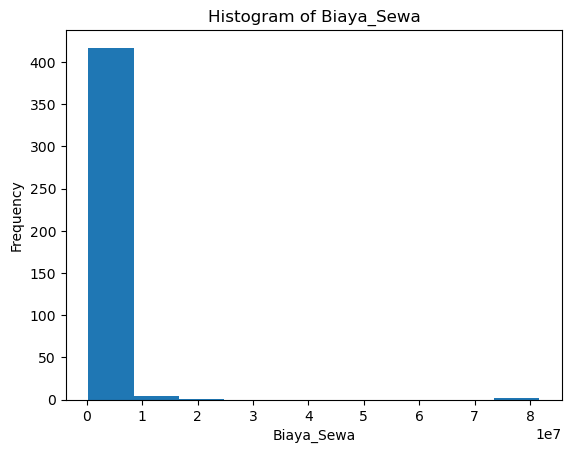

In [144]:
# Histogram of a Biaya_Sewa
plt.hist(data4['Biaya_Sewa'], bins=10)
plt.xlabel('Biaya_Sewa')
plt.ylabel('Frequency')
plt.title('Histogram of Biaya_Sewa')
plt.show()

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


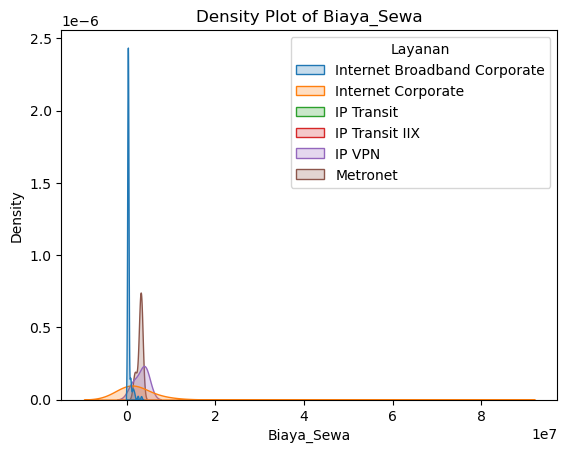

In [142]:
# Create a density plot of Biaya_Sewa
sns.kdeplot(data=data2, x='Biaya_Sewa', hue='Layanan', fill=True, common_norm=False)
plt.title('Density Plot of Biaya_Sewa')
plt.xlabel('Biaya_Sewa')
plt.ylabel('Density')
plt.show()

In [137]:
# Calculate the sum of the Wilayah variable
total_wilayah = data4['Wilayah'].sum()

# Calculate summary statistics for other variables
summary_stats = data4.describe()

# Create a DataFrame with aggregated statistics
aggregated_stats = pd.DataFrame({
    'Total Wilayah': [total_wilayah],
    'Mean Biaya_Sewa': [summary_stats.loc['mean', 'Biaya_Sewa']],
    'Median Biaya_Sewa': [summary_stats.loc['50%', 'Biaya_Sewa']],
    'Max Bandwidth': [summary_stats.loc['max', 'Bandwidth']],
    'Min Kabupaten/Kota': [summary_stats.loc['min', 'Kabupaten/Kota']]
})

print(aggregated_stats)

   Total Wilayah  Mean Biaya_Sewa  Median Biaya_Sewa  Max Bandwidth  \
0           3383     1.279557e+06           297297.0         1200.0   

   Min Kabupaten/Kota  
0                 0.0  


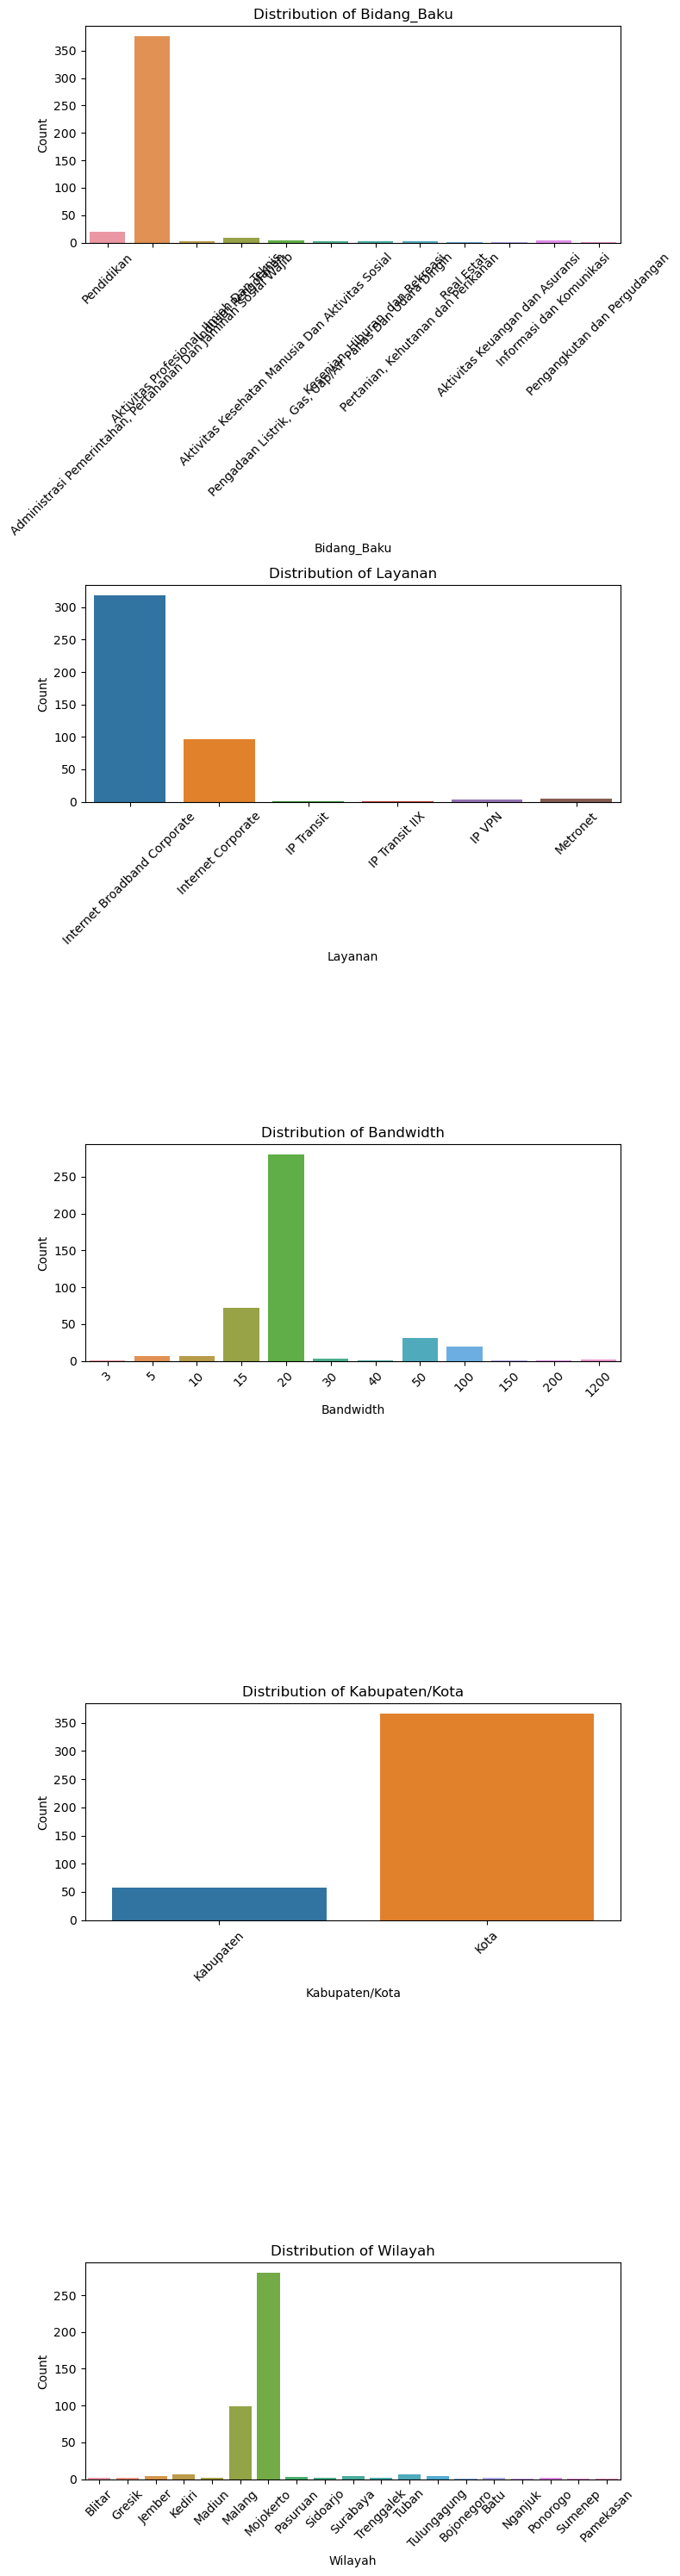

In [103]:
# Select the categorical variables
categorical_vars = ['Bidang_Baku', 'Layanan', 'Bandwidth', 'Kabupaten/Kota', 'Wilayah']

# Create subplots for each categorical variable
fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(8, 6 * len(categorical_vars)))
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=data2, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [104]:
# # Grouped bar chart
# fig, ax = plt.subplots()

# sns.catplot("Layanan", hue="AR_Type", data=data4, kind="object", ax=ax)

# plt.close(2) # catplot creates an extra figure we don't need

# ax.legend(title="Passenger Class")
# #ax.set_xticklabels(["did not survive", "survived"])
# ax.set_xlabel("")

# fig.suptitle("Layanan vs. AR Type");

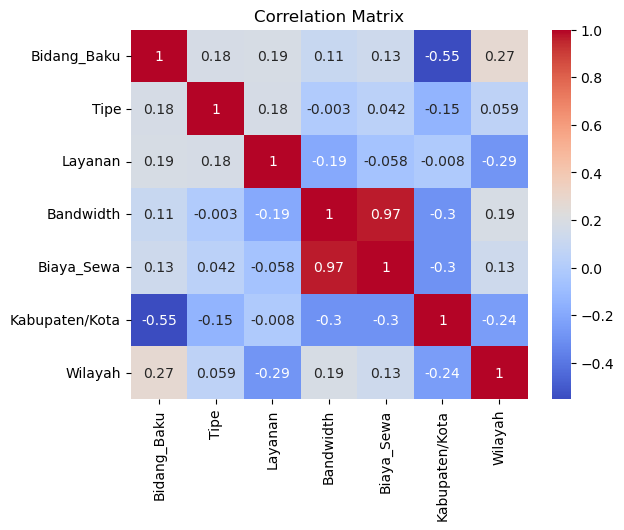

In [105]:
# Correlation matrix
correlation_matrix = data4.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

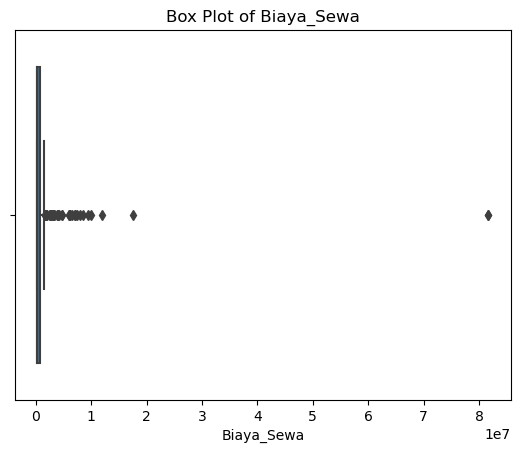

In [106]:
# Box plot of a Biaya_Sewa with potential outliers
sns.boxplot(x='Biaya_Sewa', data=data4)
plt.xlabel('Biaya_Sewa')
plt.title('Box Plot of Biaya_Sewa')
plt.show()

## **Check Outliers**

In [107]:
# Fill NaN values with 0
data4 = data4.fillna(0)

# Check the updated dataset
print(data4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 218 to 1743
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Bidang_Baku     424 non-null    int32
 1   Tipe            424 non-null    int32
 2   Layanan         424 non-null    int32
 3   Bandwidth       424 non-null    int32
 4   Biaya_Sewa      424 non-null    int32
 5   Kabupaten/Kota  424 non-null    int32
 6   Wilayah         424 non-null    int32
dtypes: int32(7)
memory usage: 14.9 KB
None


In [108]:
import pandas as pd
import numpy as np
from scipy import stats

# Select the numerical variables for outlier detection
numerical_vars = ['Bidang_Baku', 'Layanan', 'Bandwidth', 'Biaya_Sewa', 'Kabupaten/Kota', 'Wilayah', 'Biaya_Sewa']

# Detect outliers using z-score method
outliers = []
for var in numerical_vars:
    z_scores = stats.zscore(data4[var])
    threshold = 3  # Adjust this threshold as needed
    var_outliers = data4[np.abs(z_scores) > threshold]
    outliers.append(var_outliers)

# Concatenate the outliers for all variables
outliers = pd.concat(outliers)

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
      Bidang_Baku  Tipe  Layanan  Bandwidth  Biaya_Sewa  Kabupaten/Kota  \
218             7     0        3        100     1800000               0   
269             7     0        3        100     1700000               0   
271             7     0        3         50      985000               0   
305             7     0        3        100     1600000               0   
309             7     0        3        100     1350000               1   
310             7     0        3        100     1500000               1   
1248            8     0        3         50      500000               0   
1250            7     0        3         50     2500000               0   
1262            7     0        3        100     1500000               0   
1263            7     0        3         50      900000               0   
1266            7     0        3        100     2500000               0   
1278            7     0        3        100     1600000               0   
1279           

## **Chi-Square Tests**

In [109]:
data4.columns

Index(['Bidang_Baku', 'Tipe', 'Layanan', 'Bandwidth', 'Biaya_Sewa',
       'Kabupaten/Kota', 'Wilayah'],
      dtype='object')

**Bidang Baku**

In [110]:
# Assuming data4 is your DataFrame
cross_tab2 = data4.groupby(['Bidang_Baku', 'Layanan'])['Biaya_Sewa'].mean().unstack()
cross_tab2

Layanan,0,1,2,3,4,5
Bidang_Baku,,,,,,
0,81675675.0,6000000.0,1500000.0,3.492190e+05,2.321139e+06,1868000.0
1,NaN,NaN,NaN,1.441441e+06,5.971739e+06,NaN
2,NaN,NaN,NaN,NaN,4.650000e+06,NaN
3,NaN,NaN,NaN,1.415000e+06,2.750000e+06,NaN
4,NaN,NaN,NaN,2.614189e+06,6.150000e+06,3200000.0
5,NaN,NaN,4100000.0,NaN,5.500000e+06,NaN
6,NaN,NaN,NaN,3.250000e+06,3.750000e+06,NaN
7,NaN,NaN,NaN,1.495357e+06,4.950000e+06,NaN
8,NaN,NaN,NaN,5.000000e+05,7.100000e+06,NaN


In [111]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab2)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = nan
p-value= nan
degrees of freedom = 55


**Tipe**

In [112]:
cross_tab2 = pd.crosstab(data4['Tipe'], data4['Layanan'])
cross_tab2

Layanan,0,1,2,3,4,5
Tipe,,,,,,
0,1,1,0,318,96,0
1,0,0,3,0,0,5


In [113]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab2)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 424.0
p-value= 1.9884131473657308e-89
degrees of freedom = 5


**Bandwidth**

In [114]:
cross_tab3 = pd.crosstab(data4['Bandwidth'], data4['Layanan'])
cross_tab3

Layanan,0,1,2,3,4,5
Bandwidth,,,,,,
3,0,0,0,0,0,1
5,0,0,0,0,2,4
10,0,0,1,2,4,0
15,0,0,0,0,72,0
20,0,0,0,279,1,0
30,0,0,0,0,3,0
40,0,0,0,0,1,0
50,0,1,0,22,8,0
100,0,0,2,15,2,0


In [115]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab3)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 940.4075199760152
p-value= 2.0631350875854673e-161
degrees of freedom = 55


**Biaya_Sewa**

In [116]:
cross_tab4 = pd.crosstab(data4['Biaya_Sewa'], data4['Layanan'])
cross_tab4

Layanan,0,1,2,3,4,5
Biaya_Sewa,,,,,,
297297,0,0,0,274,0,0
400000,0,0,0,2,0,0
500000,0,0,0,1,0,0
520000,0,0,0,1,0,0
800000,0,0,0,1,70,0
815384,0,0,0,11,0,0
815385,0,0,0,1,0,0
900000,0,0,0,2,0,0
900900,0,0,0,1,0,0


In [117]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab4)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 1586.9698748043816
p-value= 6.826418905144897e-191
degrees of freedom = 255


**Kabupaten/Kota**

In [118]:
cross_tab5 = pd.crosstab(data4['Kabupaten/Kota'], data4['Layanan'])
cross_tab5

Layanan,0,1,2,3,4,5
Kabupaten/Kota,,,,,,
0,1,1,2,35,17,2
1,0,0,1,283,79,3


In [119]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab5)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 25.93141762452107
p-value= 9.201081114273091e-05
degrees of freedom = 5


**Wilayah**

In [120]:
cross_tab6 = pd.crosstab(data4['Wilayah'], data4['Layanan'])
cross_tab6

Layanan,0,1,2,3,4,5
Wilayah,,,,,,
0,0,0,0,0,1,1
1,0,0,0,1,1,0
2,0,0,0,0,1,0
3,0,0,0,1,0,1
4,0,1,0,1,1,1
5,0,0,0,2,3,1
6,0,0,0,2,0,0
7,0,0,0,21,78,0
8,0,0,0,278,2,0


In [121]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab6)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 931.4555014430014
p-value= 5.665192028344945e-140
degrees of freedom = 90


## **Save the DataFrame**

#**Modeling**

## Split Data

In [122]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression #digunakan untuk membuat model multinomial logistic regression
from sklearn.naive_bayes import GaussianNB #digunakan untuk membuat model naive bayes
from sklearn.tree import DecisionTreeClassifier #digunakan untuk membuat model decision tree
from sklearn.ensemble import RandomForestClassifier #digunakan untuk membuat model random forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib

In [123]:
# Load the data into a DataFrame
df = pd.DataFrame(data4)

# Split the data into training and testing sets
X = df.drop('Layanan', axis=1)
y = df[['Layanan', 'Biaya_Sewa']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Data Imbalance

In [124]:
layanan_value_counts = y_train['Layanan'].value_counts(normalize=True)
print(layanan_value_counts)

3    0.743363
4    0.233038
5    0.011799
2    0.008850
1    0.002950
Name: Layanan, dtype: float64


In [125]:
Biaya_Sewa_value_counts = y_train['Biaya_Sewa'].value_counts(normalize=True)
print(Biaya_Sewa_value_counts)

297297      0.646018
800000      0.168142
815384      0.020649
3200000     0.008850
2500000     0.008850
1306306     0.005900
1600000     0.005900
400000      0.005900
6000000     0.005900
4100000     0.005900
1700000     0.005900
2700000     0.005900
3250000     0.005900
900000      0.005900
1500000     0.005900
7000000     0.005900
900900      0.002950
4800000     0.002950
2000000     0.002950
10000000    0.002950
520000      0.002950
2800000     0.002950
81675675    0.002950
1415000     0.002950
500000      0.002950
3750000     0.002950
1300000     0.002950
3378378     0.002950
4650000     0.002950
9500000     0.002950
1200000     0.002950
6225081     0.002950
8500000     0.002950
985000      0.002950
1868000     0.002950
7100000     0.002950
7499000     0.002950
8000000     0.002950
2750000     0.002950
2540540     0.002950
6216216     0.002950
1800000     0.002950
6500000     0.002950
815385      0.002950
Name: Biaya_Sewa, dtype: float64


It is clear that train set is imbalanced. I will build first model with this data and later on try to balance it using SMOTE.

## Baseline Model - Multinomial Logistic Regression

In [126]:
cat_cols = X_train.select_dtypes(include='object').columns
indices = []
for col in cat_cols:
    indices.append(X_train.columns.get_loc(col))
indices

[]

In [127]:
transformer = ColumnTransformer(transformers=[('categorical',
                                               OneHotEncoder(handle_unknown = 'ignore'), indices)],
                                remainder = 'passthrough')

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Load the preprocessed data into a DataFrame
df = pd.DataFrame(data4)

# Split the data into training and testing sets
X = df.drop(['Layanan', 'Biaya_Sewa'], axis=1)
y = df[['Layanan', 'Biaya_Sewa']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create a multi-output regressor using BaggingRegressor
regressor = MultiOutputRegressor(BaggingRegressor())

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_mo = regressor.predict(X_test)
y_train_pred_mo = regressor.predict(X_train)

# Calculate the Mean Squared Error of the model
train_mse = mean_squared_error(y_train, y_train_pred_mo, multioutput='raw_values')
test_mse = mean_squared_error(y_test, y_test_pred_mo, multioutput='raw_values')

print("Train Set Mean Squared Error:", train_mse)
print("Test Set Mean Squared Error:", test_mse)

# Save the trained model as a .pkl file
joblib.dump(regressor, 'rmo_model.pkl')

Train Set Mean Squared Error: [9.96728941e-03 8.06612250e+11]
Test Set Mean Squared Error: [2.36898693e-01 6.14758244e+12]


['rmo_model.pkl']

In [129]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Assuming you've already prepared X_train, X_test, y_train, y_test

# Create a multi-output regressor using RandomForestRegressor
regressor = MultiOutputRegressor(RandomForestRegressor())

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_mo = regressor.predict(X_test)
y_train_pred_mo = regressor.predict(X_train)

# Calculate the Mean Squared Error of the model
train_mse = mean_squared_error(y_train, y_train_pred_mo, multioutput='raw_values')
test_mse = mean_squared_error(y_test, y_test_pred_mo, multioutput='raw_values')

print("Train Set Mean Squared Error:", train_mse)
print("Test Set Mean Squared Error:", test_mse)

# Save the trained model as a .pkl file
joblib.dump(regressor, 'mo_model.pkl')

Train Set Mean Squared Error: [1.11477248e-02 2.30803480e+12]
Test Set Mean Squared Error: [2.26401601e-01 1.20131993e+13]


['mo_model.pkl']

In [130]:
pred1 = X_test.iloc[0]
regressor.predict([pred1])

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[3.02000000e+00, 1.03942101e+06]])

In [132]:
# Perform multinomial logistic regression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=20000)

# Create the pipeline including the transformer, scaler, and logistic regression model
base_model_pipe = make_pipeline(transformer, StandardScaler(with_mean=False), lr)

# Fit the pipeline on the training data
base_model_pipe.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = base_model_pipe.predict(X_test)
y_train_pred = base_model_pipe.predict(X_train)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
print("Train Set Accuracy: {:.2f}%".format(train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(test_accuracy))

# Confusion matrix and classification report
print("\nConfusion Matrix:\n{}".format(confusion_matrix(y_test, y_test_pred)))
print("\nClassification Report:\n{}".format(classification_report(y_test, y_test_pred)))

ValueError: y should be a 1d array, got an array of shape (339, 2) instead.

In [ ]:
residuals = y_train == y_train_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

NameError: name 'y_train_pred' is not defined

In [ ]:
residuals = y_test == y_test_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

NameError: name 'y_test_pred' is not defined

## Multinomial Logistic Regression with Upsampled Data

In [160]:
print(X.columns)

Index(['Bidang_Baku', 'Tipe', 'Bandwidth', 'Kabupaten/Kota', 'Wilayah'], dtype='object')


In [162]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
import joblib
import pandas as pd

# Load the preprocessed data into a DataFrame
df = pd.DataFrame(data4)

# Split the data into training and testing sets
X = df.drop(['Layanan', 'Biaya_Sewa'], axis=1)
y = df[['Layanan', 'Biaya_Sewa']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

y_train = y_train .reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Calculate the minimum number of samples (n_samples) among the 199 classes
n_samples = min([len(y_train.iloc[:, i].value_counts()) for i in range(y_train.shape[1])])

# Choose a value for the n_neighbors parameter
n_neighbors = 5  # Adjust this value as needed

# Apply SMOTE if n_neighbors <= n_samples, otherwise apply RandomOverSampler
if n_neighbors <= n_samples:
    oversampler = SMOTE(sampling_strategy='not majority', k_neighbors=n_neighbors)
else:
    oversampler = RandomOverSampler(sampling_strategy='not majority')

# Apply oversampling to the training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Create individual classifiers for each target variable
classifier_layanan = BaggingClassifier(n_estimators=10, random_state=42)
classifier_biaya_sewa = BaggingClassifier(n_estimators=10, random_state=42)

# Create a multi-output classifier using Binary Relevance
mo_classifier = MultiOutputClassifier(classifier_layanan)

# Fit the classifier on the preprocessed training data
mo_classifier.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test set
y_test_pred_mo = mo_classifier.predict(X_test)
y_train_pred_mo = mo_classifier.predict(X_train_oversampled)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train_oversampled, y_train_pred_mo) * 100
test_accuracy = accuracy_score(y_test, y_test_pred_mo) * 100
print("Train Set Accuracy: {:.2f}%".format(train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(test_accuracy))

# Confusion matrix and classification report
print("\nConfusion Matrix:\n{}".format(confusion_matrix(y_test.values, y_test_pred_mo)))
print("\nClassification Report:\n{}".format(classification_report(y_test.values, y_test_pred_mo)))

# Save the trained model as a .pkl file
joblib.dump(mo_classifier, 'classifier_model.pkl')

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
residuals = y_train_oversampled == y_train_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     1256
False       9
Name: Layanan, dtype: int64


## Feature Importance Logistic Regression

In [146]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 496 to 1390
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Bidang_Baku     339 non-null    int32
 1   Tipe            339 non-null    int32
 2   Bandwidth       339 non-null    int32
 3   Kabupaten/Kota  339 non-null    int32
 4   Wilayah         339 non-null    int32
dtypes: int32(5)
memory usage: 9.3 KB


In [ ]:
# import statsmodels.api as sm
# formula ='Bidang_Baku', 'Tipe', 'Bandwidth', 'Biaya_Sewa','Kabupaten/Kota', 'Wilayah'
# lm = sm.OLS(formula, data4).fit()
# table = sm.stats.anova_lm(lm, typ=2)
# print(table)

In [148]:
dtc = DecisionTreeClassifier(criterion='entropy', splitter='best')

# Create the pipeline including the transformer, scaler, and logistic regression model
base_model_pipe_dtc = make_pipeline(StandardScaler(with_mean=False), dtc)

# Fit the pipeline on the training data
base_model_pipe_dtc.fit(X_train_oversampled, y_train_oversampled)

y_test_pred3 = base_model_pipe_dtc.predict(X_test)
y_train_pred3 = base_model_pipe_dtc.predict(X_train_oversampled)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train_oversampled)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))

#Confusion matrix and classification report
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

# Save the trained model as a .pkl file
joblib.dump(base_model_pipe_dtc, 'dtc_model.pkl')

NameError: name 'X_train_oversampled' is not defined

In [149]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# Create the pipeline including the transformer, scaler, and logistic regression model
base_model_pipe_mnb = make_pipeline(StandardScaler(with_mean=False), mnb)

# Fit the pipeline on the training data
base_model_pipe_mnb.fit(X_train, y_train)

y_test_pred2 = base_model_pipe_mnb.predict(X_test)
y_train_pred2= base_model_pipe_mnb.predict(X_train)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_test)*100))

#Confusion matrix and classification report
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))

# Save the trained model as a .pkl file
joblib.dump(base_model_pipe_mnb, 'mnb_model.pkl')

ValueError: y should be a 1d array, got an array of shape (339, 2) instead.

## Evaluation

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score


# y_pred_proba = lr.predict_proba(np.array(X_test))[:,1]

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# sns.set()

# plt.plot(fpr, tpr)

# plt.plot(fpr, fpr, linestyle = '--', color = 'k')

# plt.xlabel('False positive rate')

# plt.ylabel('True positive rate')

# AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

# plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

# plt.show()

In [ ]:
# # Importing all necessary libraries
# from sklearn.metrics import roc_curve, auc

# class_probabilities = lr.predict_proba(X_test)
# preds = class_probabilities[:, 1]

# fpr, tpr, threshold = roc_curve(y_test, preds)
# roc_auc = auc(fpr, tpr)

# # Printing AUC
# print(f"AUC for our classifier is: {roc_auc}")

# # Plotting the ROC
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [ ]:
# # Perform cross-validation
# cv_scores = cross_val_score(lr, X, y, cv=5)

# # Print the cross-validation scores
# print('Cross-Validation Scores:', cv_scores)
# print('Average Accuracy:', cv_scores.mean())